### Dependencies

In [2]:
import matplotlib as mpl
import matplotlib.lines as mlines
from matplotlib.ticker import FormatStrFormatter
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

new_rc_paramas = {
    'text.usetex' : True,
    'figure.dpi' : 180,
    'text.latex.preamble' : r'\usepackage{libertine}'r'\usepackage{libertinust1math}',
    'font.family' : 'Linux Libertine',
    'axes.titlesize' : 22,
    'axes.labelsize' : 18,
    'xtick.labelsize' : 16,
    'ytick.labelsize' : 16,
    'xtick.direction' : 'in',
    'ytick.direction' : 'in',
    'xtick.top' : True,
    'ytick.right' : True,
    'legend.fontsize' : 'large',
    'axes.linewidth' : 1.2,
    'savefig.bbox' : 'tight',
    'image.aspect' : 'equal',
}

import matplotlib.pyplot as plt

mpl.rcParams.update(new_rc_paramas)

import numpy as np

### Speedup

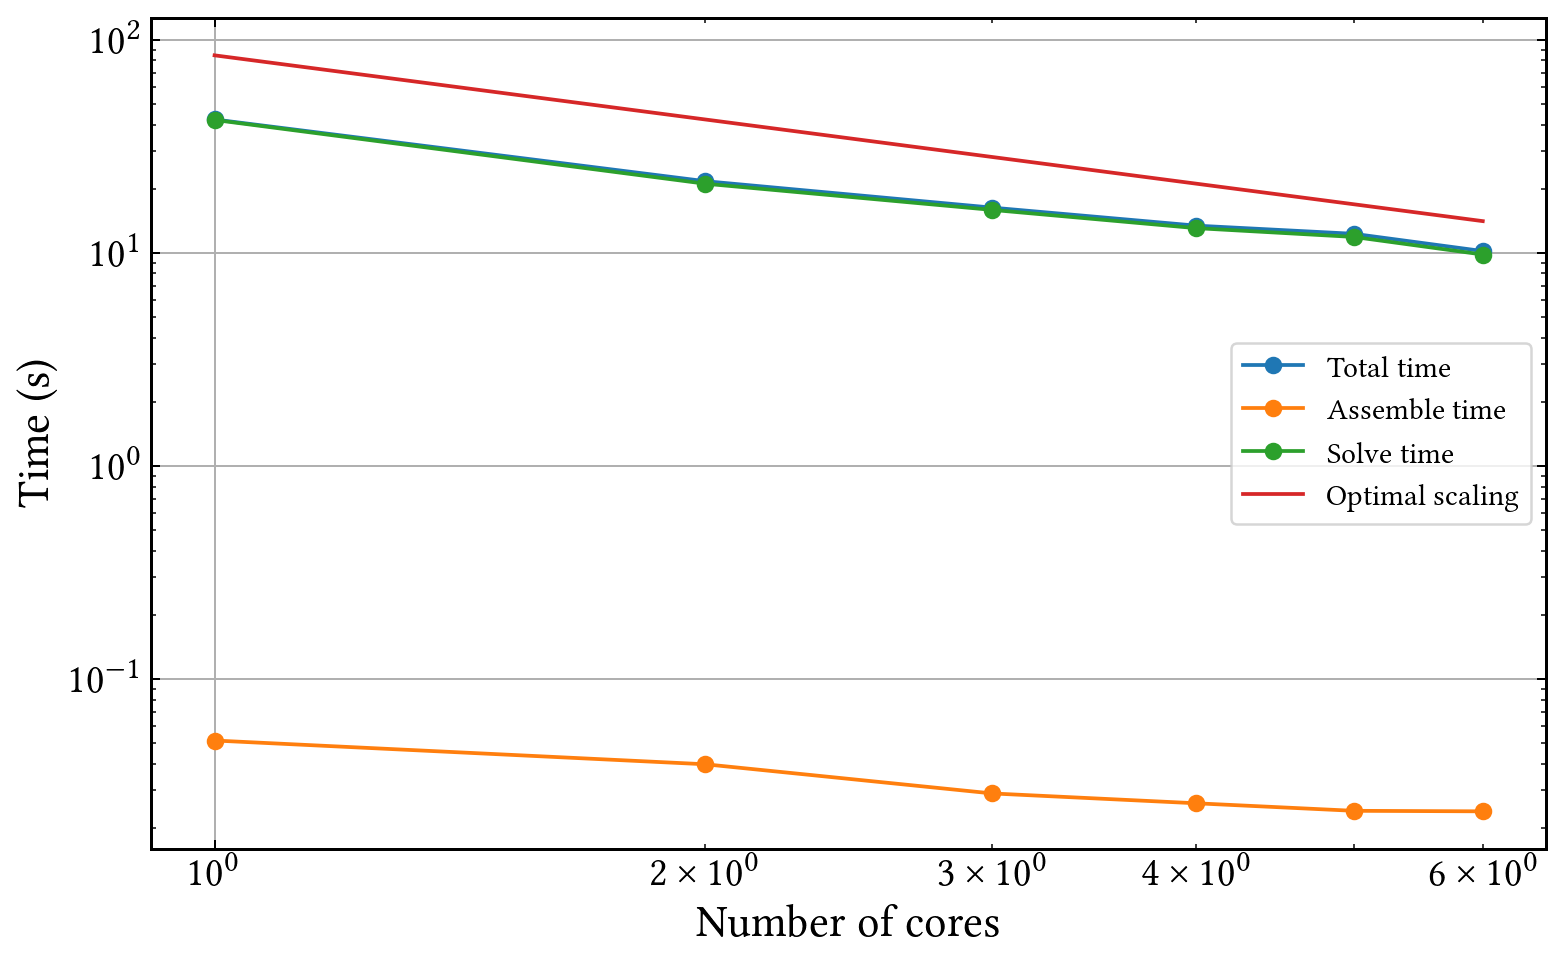

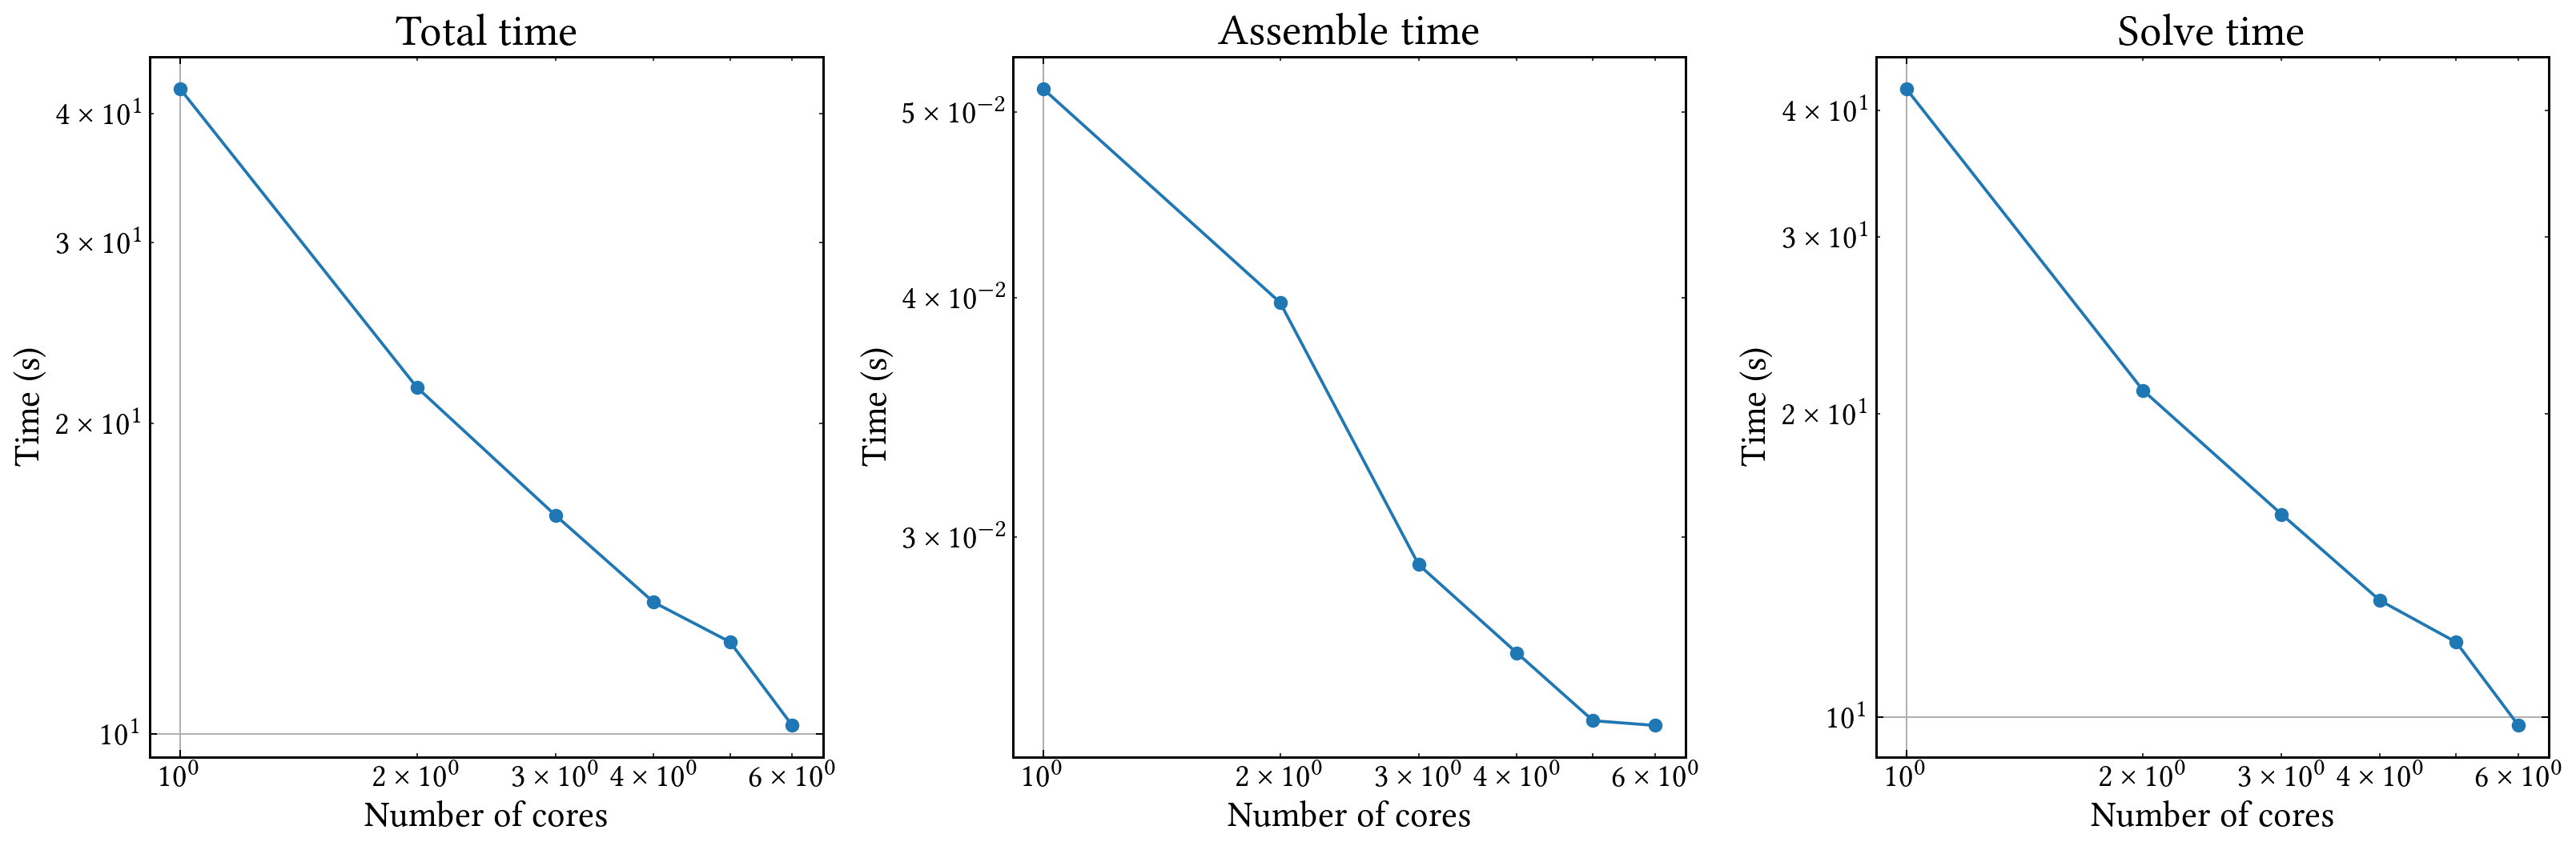

In [14]:
# measuring the cpu times for parallel vs serial code

# time measured in seconds

# solving 1D Poisson with strong Dirichlet BC with n = 1e6 elements

# run on Dardel using srun -n 2 -p shared -t 0:10:00 -A edu24.sf2568 ./main

# n = 1e5
"""
Final residual after 99255 iterations: 9.75205e-11
Solution written to solution_0.dat
Elapsed total time: 377.887 s
Assemble time: 0.135746 s
Solve time: 377.627 s
Output time: 0.124334 s
"""

# n = 5e4
time_total = [42.2555, 21.692, 16.3001, 13.4213, 12.2837, 10.1923]
time_assemble = [0.051415, 0.039773, 0.029019, 0.026095, 0.024051, 0.023914]
time_solve = [42.0412, 21.1052, 15.9033, 13.062, 11.8742, 9.81678]
time_output = [0.162902, 0.548023, 0.367887, 0.30083, 0.386122, 0.352233]

# linear decrease in time with number of cores

time_linear = [2*time_total[0] / (i + 1) for i in range(6)]

cores = [1, 2, 3, 4, 5, 6]

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.loglog(cores, time_total, marker='o', label='Total time')
ax.loglog(cores, time_assemble, marker='o', label='Assemble time')
ax.loglog(cores, time_solve, marker='o', label='Solve time')
ax.loglog(cores, time_linear, label='Optimal scaling')

ax.set_xlabel('Number of cores')
ax.set_ylabel('Time (s)')
ax.legend()
ax.grid()
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

ax1.set_title('Total time')
ax1.loglog(cores, time_total, marker='o')
ax1.set_xlabel('Number of cores')
ax1.set_ylabel('Time (s)')
ax1.grid()

ax2.set_title('Assemble time')
ax2.loglog(cores, time_assemble, marker='o')
ax2.set_xlabel('Number of cores')
ax2.set_ylabel('Time (s)')
ax2.grid()

ax3.set_title('Solve time')
ax3.loglog(cores, time_solve, marker='o')
ax3.set_xlabel('Number of cores')
ax3.set_ylabel('Time (s)')
ax3.grid()

fig.tight_layout()
plt.show()

